In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
import pickle
#import gensim
import json
import re
import random
from seqeval.metrics import classification_report
from tqdm import tqdm
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras_contrib.layers import CRF
from copy import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def f(x):
    args= [1,-2,2,3,-4]
    y = 0
    for i, a in enumerate(args):
        y += a*x**i
    return y
#

In [3]:
f(5)

-2084

In [4]:
x=[]
y=[]
for i in [a/10 for a in range(-100,100,5)]:
    x.append(i)
    y.append(f(i))

In [5]:
input = Input(shape=(1,))
dense_1 = Dense(256, activation="relu")(input)
dense_2 = Dense(256, activation="relu")(dense_1)
output = Dense(1, activation='linear')(dense_2)

model = Model(inputs=input, outputs=output)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=Adam(lr=0.1), loss="mean_squared_error")

In [ ]:
epoch=10000
for i in range(1, epoch+1):
    print(i,'/',epoch)
    model.fit(x,y,batch_size=500,epochs=1)

In [9]:
model.predict([5])

array([[-2088.4856]], dtype=float32)

In [10]:
f(5)

-2084

In [11]:
x=[i/10 for i in range(-10,10)]

In [12]:
y_pred = model.predict(x)

In [13]:
y = [f(i) for i in x]

In [ ]:
plt

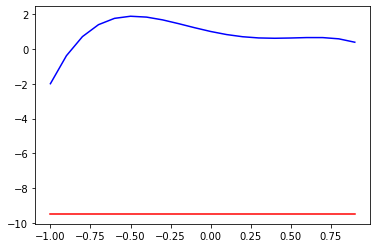

In [14]:
plt.plot(x, y_pred,c='r')
plt.plot(x, y,c='b')
plt.show()